<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Задача: Проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 
8
8 рублей;
стоимость старта (начала поездки) — 
50
50 рублей;
с подпиской Ultra
абонентская плата — 
199
199 рублей в месяц;
стоимость одной минуты поездки — 
6
6 рублей;
стоимость старта — бесплатно.
</div>


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [34]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_sub = pd.read_csv('/datasets/subscriptions_go.csv')

In [35]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [36]:
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [37]:
data_sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Шаг 2. Предобработка данных

In [38]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [39]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [40]:
data_sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Отлично! В данных нет пропущенных значений
Далее проверим типы данных и сразу поменяем при необходимости
</div>

In [41]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [42]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [43]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format="%Y-%m-%d")
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [44]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes



<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Все типы данных теперь в порядке!
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Добавляем отдельный столбец с месяцем
</div>

In [45]:
data_rides['month'] = data_rides['date'].dt.month
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Приступаем к проверки на дупликаты и по необходимости к обработке
</div>

In [46]:
data_users.duplicated().sum()

31

In [47]:
data_users = data_users.drop_duplicates()
data_users.duplicated().sum()

0

In [48]:
data_rides.duplicated().sum()

0

In [49]:
data_sub.duplicated().sum()

0

In [50]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Дубликаты явные проверили, для неявных города так же проверили
</div>

#### Шаг 3. Исследовательский анализ данных

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Опишите и визуализируйте общую информацию о пользователях и поездках:
3.1частота встречаемости городов;
3.2соотношение пользователей с подпиской и без подписки;
3.3возраст пользователей;
3.4расстояние, которое пользователь преодолел за одну поездку;
3.5продолжительность поездок.
</div>

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

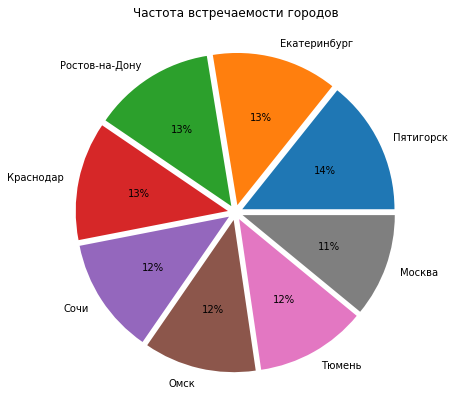

In [51]:
count_users_from_city = data_users['city'].value_counts()
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05) 
data_users['city'].value_counts().plot( kind='pie', y=count_users_from_city,autopct = '%1.0f%%', figsize=(7,7),title = 'Частота встречаемости городов', explode = explode).set_ylabel('')
count_users_from_city

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Города, их частота и процентное соотношение. Пятигорск самый популярный, а Москва на удивленее самамя непопоулярная
</div>

free     835
ultra    699
Name: subscription_type, dtype: int64

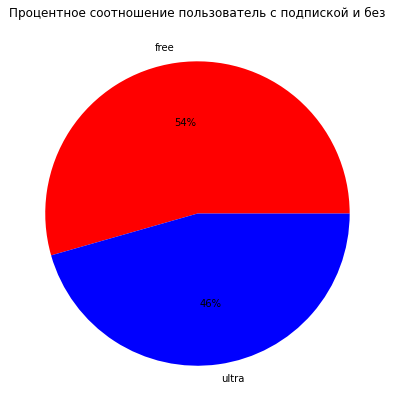

In [52]:
count_sub = data_users['subscription_type'].value_counts()
colors = ['red','blue']
data_users['subscription_type'].value_counts().plot(kind = 'pie', y = count_sub, autopct = '%1.0f%%', figsize=(7,7),
title = 'Процентное соотношение пользователь с подпиской и без', colors=colors).set_ylabel('')
count_sub

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Процентное отношение с подпиской и без, так же тип пирога идеально подходит, логично что без подписок пользователь больше, что и показывает график, но не сильно, пользователей с подпиской почти столько же
</div>

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

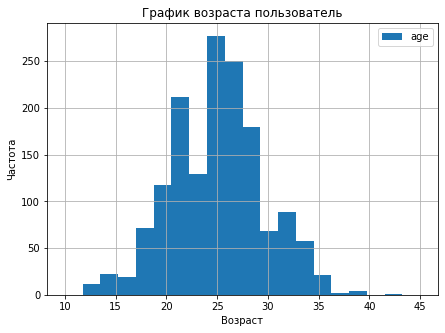

In [53]:
data_users.plot(y = 'age', kind = 'hist', bins = 20, grid=True, figsize = (7,5),range=(10,45), title='График возраста пользователь').set_xlabel('Возраст')
plt.ylabel('Частота')
data_users['age'].describe()

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
График возраста пользователь, действительно любопытно, что есть моложе 18, в основном пользователи в рамках 22-28 лет, в среднем 25
</div>

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

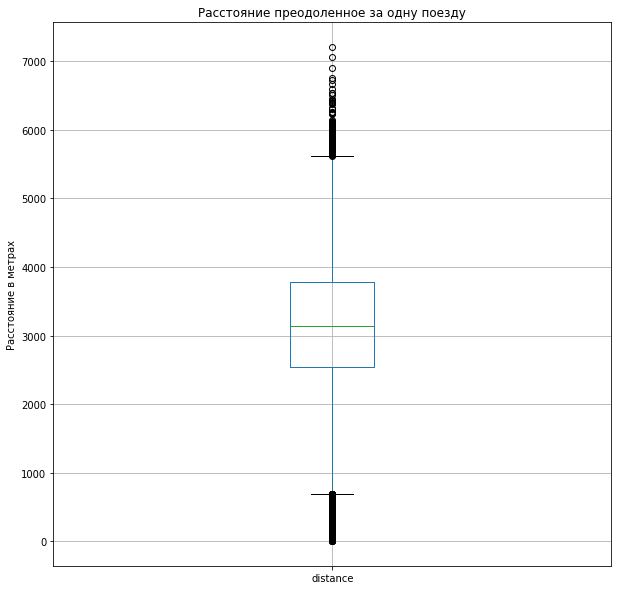

In [54]:
data_rides.boxplot(['distance'],figsize=(10,10))
plt.title('Расстояние преодоленное за одну поезду')
plt.ylabel('Расстояние в метрах')
data_rides['distance'].describe()

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Среднее расстояние у нас получается 3070м, достаточно большой разброс, но в этом нет ничего страшного все же особенности переменной предполагают такой разброс,в основная масса ездит от 2500 до 3700
</div>

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

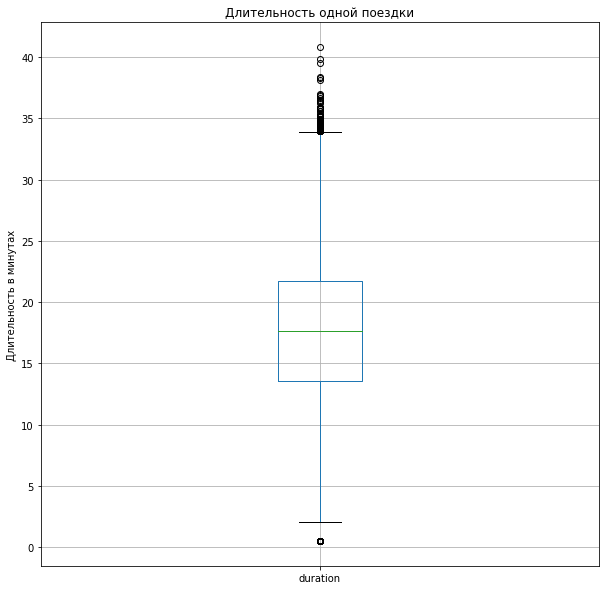

In [55]:
data_rides.boxplot(['duration'],figsize=(10,10))
plt.title('Длительность одной поездки')
plt.ylabel('Длительность в минутах')
data_rides['duration'].describe()

In [56]:
data_rides[data_rides['duration'] < 1]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Действительно в данных есть ошибка, похоже на сбои логировния, необходимо передать эту информацию коллегам.
 Из-за этого точно утверждать нельзя, но среднее время 17 минут, в основном поездки занимают от 13 до 21
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Построили графики с описаниями, переходим к следующему этапу
</div>

#### Шаг 4. Объединение данных

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Объедините данные о пользователях, поездках и подписках в один датафрейм.
 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.
    Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.
</div>

In [57]:
data_full = data_users.merge(data_rides)
data_full = data_full.merge(data_sub)
data_full

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [58]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Количество строк совпадает, пропуски не возники, все колонки присутствуют
</div>

In [59]:
users_free_sub = data_full.query("`subscription_type` == 'free'")
users_free_sub 

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

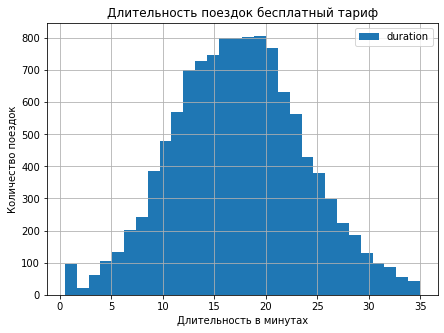

In [60]:
users_free_sub.plot(y = 'duration', kind = 'hist', bins = 30, grid=True, figsize = (7,5),title='Длительность поездок бесплатный тариф').set_xlabel('Длительность в минутах')
plt.ylabel('Количество поездок')
users_free_sub['duration'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

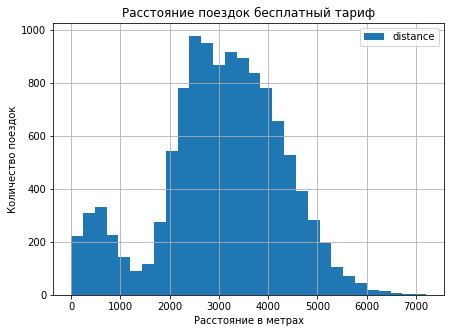

In [61]:
users_free_sub.plot(y = 'distance', kind = 'hist', bins = 30, grid=True, figsize = (7,5),title='Расстояние поездок бесплатный тариф').set_xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
users_free_sub['distance'].describe()

In [62]:
users_ultra_sub = data_full.query("`subscription_type` == 'ultra'")
users_ultra_sub 

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

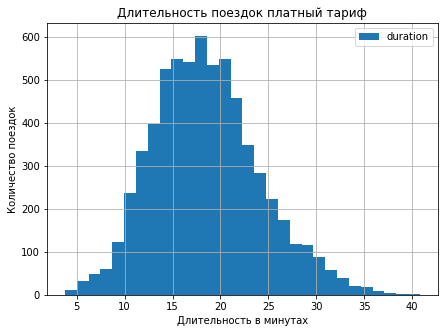

In [63]:
users_ultra_sub.plot(y = 'duration', kind = 'hist', bins = 30, grid=True, figsize = (7,5),title='Длительность поездок платный тариф').set_xlabel('Длительность в минутах')
plt.ylabel('Количество поездок')
users_free_sub['duration'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

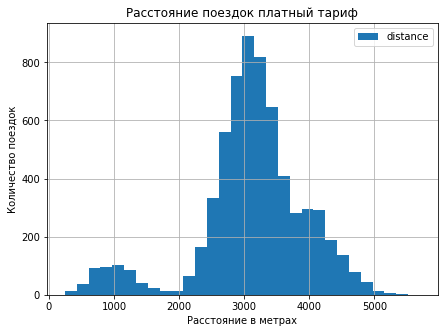

In [64]:
users_ultra_sub.plot(y = 'distance', kind = 'hist', bins = 30, grid=True, figsize = (7,5),title='Расстояние поездок платный тариф').set_xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
users_free_sub['distance'].describe()

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
    Объединили данные, создали 2 новых датафрейма и визуализировали данные о расстояние и времени для двух категорий
</div>

#### Шаг 5. Подсчёт выручки

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
    Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
    В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа
</div>

In [65]:
revenue_data = pd.pivot_table(data_full, index=['month', 'user_id'], values = ['distance', 'duration', 'name', 'subscription_type'],
aggfunc = {'distance': sum, 'duration' : sum,'name' : len, 'subscription_type' : min})
revenue_data

distance   duration  name subscription_type
month user_id                                                
1     1        7027.511294  41.416640     2             ultra
      3        3061.777147  12.654443     1             ultra
      5        3914.646990  12.395153     1             ultra
      7        6478.080979  27.653450     2             ultra
      12       3577.151148  32.462907     1             ultra
...                    ...        ...   ...               ...
12    1525     4597.854350  33.220866     1              free
      1526     3644.121544  22.665456     1              free
      1528     3998.569324  10.272902     1              free
      1532     6111.889853  40.128222     2              free
      1534     2371.711192  15.893917     1              free

[11331 rows x 4 columns]

In [66]:
revenue_data.rename(columns = {'name':'count_trips'}, inplace = True)

In [67]:
revenue_data['duration'] = np.ceil(revenue_data['duration'])
revenue_data

distance  duration  count_trips subscription_type
month user_id                                                      
1     1        7027.511294      42.0            2             ultra
      3        3061.777147      13.0            1             ultra
      5        3914.646990      13.0            1             ultra
      7        6478.080979      28.0            2             ultra
      12       3577.151148      33.0            1             ultra
...                    ...       ...          ...               ...
12    1525     4597.854350      34.0            1              free
      1526     3644.121544      23.0            1              free
      1528     3998.569324      11.0            1              free
      1532     6111.889853      41.0            2              free
      1534     2371.711192      16.0            1              free

[11331 rows x 4 columns]

In [68]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['count_trips']
    else:
        return 'Not such sub'

In [69]:
revenue_data['revenue_per_month'] = revenue_data.apply(revenue, axis = 1)
revenue_data.head(10)

distance  duration  count_trips subscription_type  \
month user_id                                                         
1     1        7027.511294      42.0            2             ultra   
      3        3061.777147      13.0            1             ultra   
      5        3914.646990      13.0            1             ultra   
      7        6478.080979      28.0            2             ultra   
      12       3577.151148      33.0            1             ultra   
      13       6687.987446      42.0            2             ultra   
      14       7699.643820      34.0            2             ultra   
      15       4187.621459      39.0            1             ultra   
      20       3516.719208      29.0            1             ultra   
      22       3058.692225      13.0            1             ultra   

               revenue_per_month  
month user_id                     
1     1                    451.0  
      3                    277.0  
      5                    277.0  
      7                    367.0  
      12                   397.0  
      13                   451.0  
      14                   403.0  
      15                   433.0  
      20                   373.0  
      22                   277.0

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
    Создали датафрейм с агрегированными данными о поездках нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Добавили столбец с помесячной выручкой, которую принёс каждый пользователь. 
</div>

#### Шаг 6. Проверка гипотез

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
    Проверить гипотезы:
    1. понять, тратят ли пользователи с подпиской больше времени на поездки? 
    2.Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
    3. будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
    пользователи с подпиской больше времени на поездки
    H_0: duration при ultra = duration при free
    H_1: duration при ultra > duration при free
    alpha = 0.05
</div>

In [70]:
ultra = users_ultra_sub['duration']
free = users_free_sub['duration']
results = st.ttest_ind(ultra, free, alternative = 'greater')
alpha = 0.05
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
   Проверили  гипотезу, по итогам проверки отвергаем ее
</div>


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
   гипотеза: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.
    H_0: distance при ultra = 3130 метров
    H_1: distance при ultra < 3130 метров
</div>

In [71]:
ultra_dist = users_ultra_sub['distance']

interested_value = 3130.0

alpha = 0.05

results = st.ttest_1samp(ultra_dist, interested_value, alternative='less')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.08046311521502146
Не удалось отвергнуть нулевую гипотезу


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
   По итогам проверки нельзя утверждать, что пользователи с подпиской проезжают расстояние не превыщающие 3130 метров
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
   помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
H_0: revenue_per_month при ultra = revenue_per_month при free
H_1: revenue_per_month при ultra > revenue_per_month при free
</div>

In [72]:
ultra_per_month = revenue_data.loc[revenue_data.subscription_type == 'ultra', 'revenue_per_month'] 
free_per_month = revenue_data.loc[revenue_data.subscription_type == 'free', 'revenue_per_month'] 
results = st.ttest_ind(ultra_per_month, free_per_month, alternative = 'greater')

alpha = 0.05
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')


2.8130926188487286e-35
Отвергаем нулевую гипотезу


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
   По итогам проверки можно утверждать, что пользователи с подпиской приносят больше денег, чем без подписки
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

На мой взгляд, лучше всего подойдет гипотеза о равенстве средних для зависимых выборок.
H0: u1 = u2
H1: u1 != u2
u1, u2 - среднее количество обращение до и после
Для сравнения метод scipy.stats.ttest_rel()

</div>

#### Шаг 7. ВЫВОД

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
ОБЩИЙ ВЫВОД:
   
Загрузили 3 датафрейма, проверили данные, обработали пропуски и дубликаты. Приступили к поставленной задаче, просмотрели данные визуализировали их, вывели общую информацию. Далее приступили к объединению данных для дальнейшей работы, создали 2 доп. датафрейма.Подсчитали помесячкую выручку. Перешли к проверки гипотез 1. понять, тратят ли пользователи с подпиской больше времени на поездки? 
       Проверили  гипотезу, по итогам проверки отвергаем ее
    2.Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
    По итогам проверки нельзя утверждать, что пользователи с подпиской проезжают расстояние не превыщающие 3130 метров
    3. будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
    По итогам проверки можно утверждать, что пользователи с подпиской приносят больше денег, чем без подписки
    Ответили на поставленный вопрос.
    С данными можно провести еще множество работы, проверить множество гипотез. Сделать и оформить доп.задание.
</div>